In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_interactions import zoom_factory
%matplotlib widget

gampix_output = h5py.File('/sdf/data/neutrino/jvaccaro/NueArCC_gampixpy/nueArCC_sns_g4_gampixpy_0000.h5', 'r')
edepsim_output = h5py.File('/sdf/data/neutrino/yuntse/coherent/SNeNDSens/g4/NueArCC/nueArCC_sns_g4_0000.h5', 'r')

In [8]:
def check_metadata_ordering(f):
    print("Checking metadata...")
    event_id = f['meta'][0]['event id']

    for evt in f['meta']:
        while evt['event id'] > (event_id + 1):
            print("Bad event: event #" + str(event_id + 1) + " has no associated vertex!")
            event_id += 1

        event_id = evt['event id']

    print("Done!")

check_metadata_ordering(gampix_output)

Checking metadata...
Done!


In [9]:
def check_vertex_positions(f, g):
    print("Checking metadata vertex positions...")

    for gevt, eevt in zip(f['meta'], g['vertices']):
        if gevt['vertex x'] != eevt['x_vert'] or gevt['vertex y'] != eevt['y_vert'] or gevt['vertex z'] != eevt['z_vert']:
            print("Bad event: event #" + str(gevt['event id']) + " has different vertex positions!")

    print("Done!")

"""for i in range(10):
    f = h5py.File('/sdf/data/neutrino/dougl215/gampixpy/SNeNDSens/NueArCC/NueArCC_sns_yDir_gampixpy_' + format(i, "04") + '.h5', 'r')
    g = h5py.File('/sdf/data/neutrino/yuntse/coherent/SNeNDSens/g4/NueArCC/nueArCC_sns_yDir_g4_' + format(i, "04") + '.h5', 'r')
    check_vertex_positions(f, g)"""

'for i in range(10):\n    f = h5py.File(\'/sdf/data/neutrino/dougl215/gampixpy/SNeNDSens/NueArCC/NueArCC_sns_yDir_gampixpy_\' + format(i, "04") + \'.h5\', \'r\')\n    g = h5py.File(\'/sdf/data/neutrino/yuntse/coherent/SNeNDSens/g4/NueArCC/nueArCC_sns_yDir_g4_\' + format(i, "04") + \'.h5\', \'r\')\n    check_vertex_positions(f, g)'

In [10]:
detector_bounds = [[-30, 30], [-25, 25], [-30, 30]] # cm (x, y, z)
def draw_boundaries(ax):
    """
    Draw the detector boundaries as a wireframe
    not needed, but pretty
    """
    boundKwargs = {'color': 'black',
                   'ls': '--'}
    
    ax.plot([detector_bounds[0][0], detector_bounds[0][1]],
            [detector_bounds[1][0], detector_bounds[1][0]],
            [detector_bounds[2][0], detector_bounds[2][0]],
            **boundKwargs)
    ax.plot([detector_bounds[0][0], detector_bounds[0][1]],
            [detector_bounds[1][1], detector_bounds[1][1]],
            [detector_bounds[2][0], detector_bounds[2][0]],
            **boundKwargs)
    ax.plot([detector_bounds[0][0], detector_bounds[0][1]],
            [detector_bounds[1][0], detector_bounds[1][0]],
            [detector_bounds[2][1], detector_bounds[2][1]],
            **boundKwargs)
    ax.plot([detector_bounds[0][0], detector_bounds[0][1]],
            [detector_bounds[1][1], detector_bounds[1][1]],
            [detector_bounds[2][1], detector_bounds[2][1]],
            **boundKwargs)

    ax.plot([detector_bounds[0][0], detector_bounds[0][0]],
            [detector_bounds[1][0], detector_bounds[1][1]],
            [detector_bounds[2][0], detector_bounds[2][0]],
            **boundKwargs)
    ax.plot([detector_bounds[0][1], detector_bounds[0][1]],
            [detector_bounds[1][0], detector_bounds[1][1]],
            [detector_bounds[2][0], detector_bounds[2][0]],
            **boundKwargs)
    ax.plot([detector_bounds[0][0], detector_bounds[0][0]],
            [detector_bounds[1][0], detector_bounds[1][1]],
            [detector_bounds[2][1], detector_bounds[2][1]],
            **boundKwargs)
    ax.plot([detector_bounds[0][1], detector_bounds[0][1]],
            [detector_bounds[1][0], detector_bounds[1][1]],
            [detector_bounds[2][1], detector_bounds[2][1]],
            **boundKwargs)

    ax.plot([detector_bounds[0][0], detector_bounds[0][0]],
            [detector_bounds[1][0], detector_bounds[1][0]],
            [detector_bounds[2][0], detector_bounds[2][1]],
            **boundKwargs)
    ax.plot([detector_bounds[0][0], detector_bounds[0][0]],
            [detector_bounds[1][1], detector_bounds[1][1]],
            [detector_bounds[2][0], detector_bounds[2][1]],
            **boundKwargs)
    ax.plot([detector_bounds[0][1], detector_bounds[0][1]],
            [detector_bounds[1][0], detector_bounds[1][0]],
            [detector_bounds[2][0], detector_bounds[2][1]],
            **boundKwargs)
    ax.plot([detector_bounds[0][1], detector_bounds[0][1]],
            [detector_bounds[1][1], detector_bounds[1][1]],
            [detector_bounds[2][0], detector_bounds[2][1]],
            **boundKwargs)

    return ax

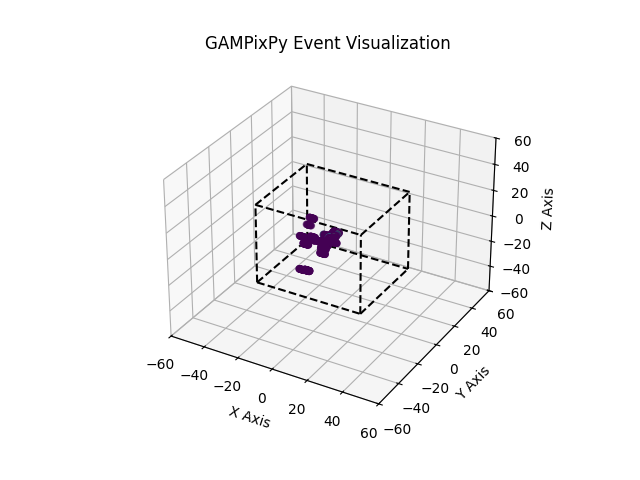

In [11]:
import matplotlib.pyplot as plt
import h5py

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.title('GAMPixPy Event Visualization')

event_id = 0 # pick your favorite!
event_pixel_hit_mask = gampix_output['pixel_hits']['event id'] == event_id
event_pixel_hits = gampix_output['pixel_hits'][event_pixel_hit_mask]

draw_boundaries(ax)

ax.scatter(event_pixel_hits['hit x'],
           event_pixel_hits['hit y'],
           event_pixel_hits['hit z'],
           c = event_pixel_hits['hit charge'])

ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
ax.set_zlim(-60, 60)

# Add labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

disconnect_zoom = zoom_factory(ax, base_scale=1.02)

plt.show()